# Exploratory Data Analysis
---

In [60]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os
import datetime as dt 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from chord import Chord
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 15
width = 0.75
from wordcloud import WordCloud
sns.set_palette(sns.color_palette('tab20', 20))
import plotly.graph_objs as go
from datetime import date, timedelta
from empath import Empath
lexicon = Empath()
import math
from textblob import TextBlob

data = pd.read_csv('/Users/qab/Desktop/Personal/NLP Projects/Context Maturity (NLP)/Data/jon_bellion.csv')

In [20]:
data.head()

,titles,album,date_released,lyrics,processed_lyrics
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe im drunk maybe im maybe happened ma...
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high shes break m...
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...


In [21]:
def extract_empath(lyrics):
    return lexicon.analyze(lyrics)

def make_tags(tags):
    tgs = [k for k, v in tags.items() if v != 0]
    return tgs

def process(st):
    st = str(st)
    table = str.maketrans(dict.fromkeys(string.punctuation))
    new_s = st.translate(table)
    return new_s

data['empath_themes'] = data['lyrics'].apply(extract_empath).apply(make_tags).apply(process).apply(lambda x: ''.join(x))

In [22]:
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe im drunk maybe im maybe happened ma...,help office dance wedding domesticwork cold ha...
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,office dance wedding domesticwork sleep family...
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,help dance domesticwork sleep cold hate envy f...
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high shes break m...,dance domesticwork vacation masculine sufferin...
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,hate family vacation horror swearingterms suff...


In [54]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes,polarity,subjectivity
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe im drunk maybe im maybe happened ma...,help office dance wedding domesticwork cold ha...,0.032692,0.464957
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,office dance wedding domesticwork sleep family...,0.309140,0.495161
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,help dance domesticwork sleep cold hate envy f...,0.027602,0.655745
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high shes break m...,dance domesticwork vacation masculine sufferin...,0.052500,0.697500
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,hate family vacation horror swearingterms suff...,0.241650,0.562948


Text(0.033692307692307716, 0.465957264957265, 'dead man wallking')

(-0.5, 0.75)

Text(0.3101397849462365, 0.4961612903225807, 'dont ask cuz i dont know')

(-0.5, 0.75)

Text(0.028601697244554393, 0.6567445200302341, 'for the dreamers')

(-0.5, 0.75)

Text(0.0535, 0.6984999999999999, 'life')

(-0.5, 0.75)

Text(0.2426498015873016, 0.5639484126984124, 'paper planes')

(-0.5, 0.75)

Text(0.05655555555555555, 0.22859462759462756, 'the wonder years')

(-0.5, 0.75)

Text(0.12119400352733684, 0.5278298059964727, 'timeless')

(-0.5, 0.75)

Text(0.2846734693877551, 0.5632448979591838, 'waves of loneliness')

(-0.5, 0.75)

Text(0.0885, 0.5551666666666667, 'while you count sheep')

(-0.5, 0.75)

Text(-0.11323310485810487, 0.6567970578803913, 'wutup snow')

(-0.5, 0.75)

Text(0.17600000000000005, 0.5714887218045114, '2 rocking chairs')

(-0.5, 0.75)

Text(0.2390353688864328, 0.617565349544073, 'eyes to the sky')

(-0.5, 0.75)

Text(-0.18978282828282825, 0.5848383838383838, 'halloween')

(-0.5, 0.75)

Text(0.11148999309868876, 0.4291228433402347, 'jim morrison')

(-0.5, 0.75)

Text(0.08988888888888893, 0.43433333333333346, 'kingdom come')

(-0.5, 0.75)

Text(0.1724015151515151, 0.37997727272727266, 'newyorksoul')

(-0.5, 0.75)

Text(0.1949102564102564, 0.5734358974358974, 'one more time')

(-0.5, 0.75)

Text(-0.028450757575757574, 0.5271363636363637, 'superman, the gift and the curse')

(-0.5, 0.75)

Text(0.23476068376068376, 0.43930891330891314, 'to my future wife...')

(-0.5, 0.75)

Text(0.19683333333333333, 0.6030833333333333, 'ungrateful eyes')

(-0.5, 0.75)

Text(0.06483955097190391, 0.5084807953484425, 'when the lions come')

(-0.5, 0.75)

Text(-0.01263636363636364, 0.35100000000000003, 'a haunted house')

(-0.5, 0.75)

Text(0.025337121212121214, 0.2755265151515151, 'an immigrant')

(-0.5, 0.75)

Text(0.13518803418803418, 0.4501452991452992, 'carry your throne')

(-0.5, 0.75)

Text(-0.16013945578231295, 0.46860204081632645, 'human')

(-0.5, 0.75)

Text(0.07934415584415583, 0.4953614718614719, 'jungle')

(-0.5, 0.75)

Text(-0.021746598639455775, 0.47889115646258507, 'luxury')

(-0.5, 0.75)

Text(0.06011949685534588, 0.5748993710691824, 'munny right')

(-0.5, 0.75)

Text(-0.0699090909090909, 0.6196363636363635, 'ooh')

(-0.5, 0.75)

Text(-0.1327037037037037, 0.612064814814815, 'pre-occupied')

(-0.5, 0.75)

Text(-0.04392630385487529, 0.4781116780045351, 'run wild')

(-0.5, 0.75)

Text(0.09147619047619046, 0.4552517006802721, 'simple and sweet')

(-0.5, 0.75)

Text(0.29014285714285715, 0.2811428571428572, "80's films")

(-0.5, 0.75)

Text(-0.006404637247569186, 0.32841211667913106, 'all time low')

(-0.5, 0.75)

Text(0.07399999999999997, 0.7267500000000003, 'fashion')

(-0.5, 0.75)

Text(0.526, 0.676, 'guillotine')

(-0.5, 0.75)

Text(-0.020817750151083468, 0.4171242769576102, 'hand of god (outro)')

(-0.5, 0.75)

Text(0.035041811846689884, 0.3144320557491289, 'he is the same')

(-0.5, 0.75)

Text(0.18195238095238095, 0.48671428571428565, 'irobot')

(-0.5, 0.75)

Text(0.2673157894736842, 0.5399473684210526, 'maybe idk')

(-0.5, 0.75)

Text(-0.19606790123456788, 0.6781604938271603, 'morning in america')

(-0.5, 0.75)

Text(0.09840137085137085, 0.4811040404040403, 'new york soul (part ii)')

(-0.5, 0.75)

Text(0.1952669172932331, 0.6820150375939849, 'overwhelming')

(-0.5, 0.75)

Text(0.35391005291005295, 0.4972962962962963, 'the good in me')

(-0.5, 0.75)

Text(0.05308333333333334, 0.48492857142857143, 'weight of the world')

(-0.5, 0.75)

Text(-0.28302877986211317, 0.5992363315696648, 'woke the fuck up')

(-0.5, 0.75)

Text(0.1203324874359357, 0.5910140568244017, 'adult swim')

(-0.5, 0.75)

Text(0.034333333333333334, 0.1990555555555556, 'blu')

(-0.5, 0.75)

Text(0.006813492063492063, 0.3383412698412698, 'cautionary tales')

(-0.5, 0.75)

Text(0.07510714285714284, 0.4469821428571429, 'conversations with my wife')

(-0.5, 0.75)

Text(-0.4417083333333333, 0.93225, 'couples retreat')

(-0.5, 0.75)

Text(-0.09622222222222217, 0.6720317460317461, 'jt')

(-0.5, 0.75)

Text(0.09023976608187138, 0.48703174603174587, "let's begin")

(-0.5, 0.75)

Text(0.07183333333333335, 0.6604246031746032, "mah's joint")

(-0.5, 0.75)

Text(-0.01968965517241377, 0.6693908045977011, 'stupid deep')

(-0.5, 0.75)

Text(0.08609070294784588, 0.5517936507936507, 'the internet')

(-0.5, 0.75)

Text(0.5, 1.0, 'Sentiment Analysis')

Text(0.5, 0, '<-- Negative -------- Positive -->')

Text(0, 0.5, '<-- Facts -------- Opinions -->')

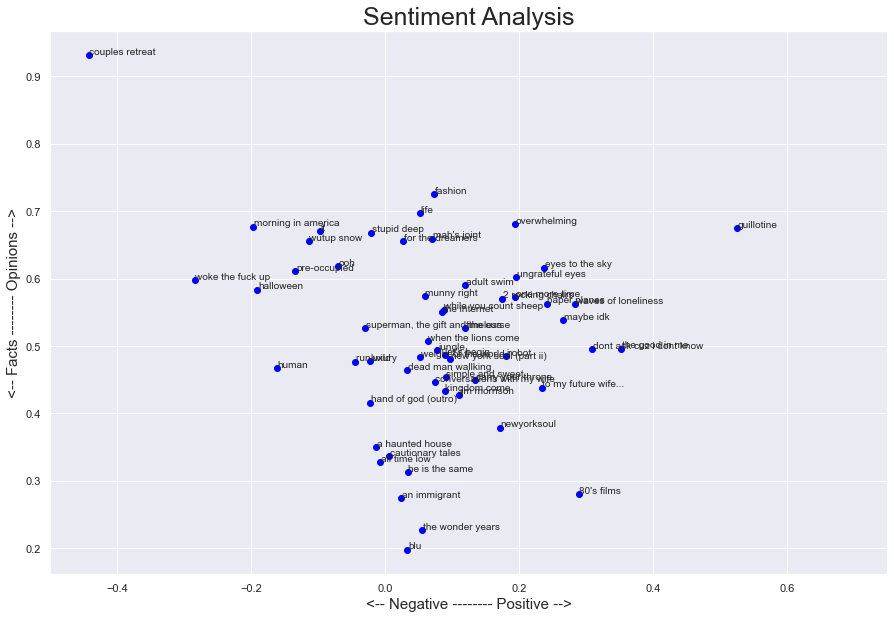

In [55]:
plt.rcParams['figure.figsize'] = [15, 10]

for index, title in enumerate(data.index):
    x = data.polarity.loc[title]
    y = data.subjectivity.loc[title]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['titles'][index], fontsize=10)
    plt.xlim(-0.50, 0.75) 
    
plt.title('Sentiment Analysis', fontsize=25)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [56]:
def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [62]:
list_pieces = []
for t in data.processed_lyrics:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [67]:
polarity_lyrics = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_lyrics.append(polarity_piece)
    
#polarity_lyrics

Text(0.5, 1.0, '1')

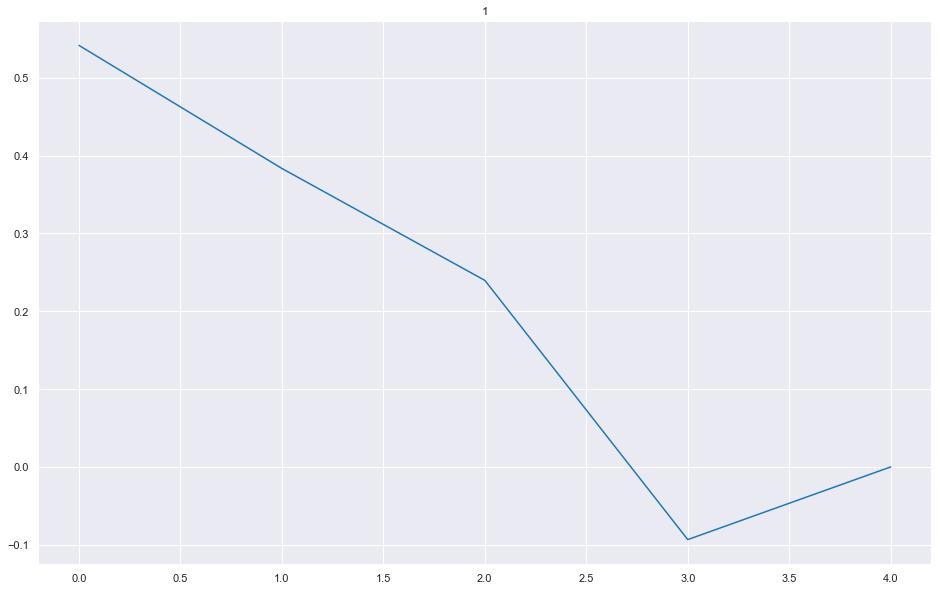

In [71]:
plt.plot(polarity_lyrics[1])
plt.title(data['titles'].index[1])
plt.show()

Text(0.5, 1.0, 'dead man wallking')

(-1.0, 1.0)

Text(0.5, 1.0, 'dont ask cuz i dont know')

(-1.0, 1.0)

Text(0.5, 1.0, 'for the dreamers')

(-1.0, 1.0)

Text(0.5, 1.0, 'life')

(-1.0, 1.0)

Text(0.5, 1.0, 'paper planes')

(-1.0, 1.0)

Text(0.5, 1.0, 'the wonder years')

(-1.0, 1.0)

Text(0.5, 1.0, 'timeless')

(-1.0, 1.0)

Text(0.5, 1.0, 'waves of loneliness')

(-1.0, 1.0)

Text(0.5, 1.0, 'while you count sheep')

(-1.0, 1.0)

Text(0.5, 1.0, 'wutup snow')

(-1.0, 1.0)

Text(0.5, 1.0, '2 rocking chairs')

(-1.0, 1.0)

Text(0.5, 1.0, 'eyes to the sky')

(-1.0, 1.0)

Text(0.5, 1.0, 'halloween')

(-1.0, 1.0)

Text(0.5, 1.0, 'jim morrison')

(-1.0, 1.0)

Text(0.5, 1.0, 'kingdom come')

(-1.0, 1.0)

Text(0.5, 1.0, 'newyorksoul')

(-1.0, 1.0)

Text(0.5, 1.0, 'one more time')

(-1.0, 1.0)

Text(0.5, 1.0, 'superman, the gift and the curse')

(-1.0, 1.0)

Text(0.5, 1.0, 'to my future wife...')

(-1.0, 1.0)

Text(0.5, 1.0, 'ungrateful eyes')

(-1.0, 1.0)

Text(0.5, 1.0, 'when the lions come')

(-1.0, 1.0)

Text(0.5, 1.0, 'a haunted house')

(-1.0, 1.0)

Text(0.5, 1.0, 'an immigrant')

(-1.0, 1.0)

Text(0.5, 1.0, 'carry your throne')

(-1.0, 1.0)

Text(0.5, 1.0, 'human')

(-1.0, 1.0)

Text(0.5, 1.0, 'jungle')

(-1.0, 1.0)

Text(0.5, 1.0, 'luxury')

(-1.0, 1.0)

Text(0.5, 1.0, 'munny right')

(-1.0, 1.0)

Text(0.5, 1.0, 'ooh')

(-1.0, 1.0)

Text(0.5, 1.0, 'pre-occupied')

(-1.0, 1.0)

Text(0.5, 1.0, 'run wild')

(-1.0, 1.0)

Text(0.5, 1.0, 'simple and sweet')

(-1.0, 1.0)

Text(0.5, 1.0, "80's films")

(-1.0, 1.0)

Text(0.5, 1.0, 'all time low')

(-1.0, 1.0)

Text(0.5, 1.0, 'fashion')

(-1.0, 1.0)

Text(0.5, 1.0, 'guillotine')

(-1.0, 1.0)

Text(0.5, 1.0, 'hand of god (outro)')

(-1.0, 1.0)

Text(0.5, 1.0, 'he is the same')

(-1.0, 1.0)

Text(0.5, 1.0, 'irobot')

(-1.0, 1.0)

Text(0.5, 1.0, 'maybe idk')

(-1.0, 1.0)

Text(0.5, 1.0, 'morning in america')

(-1.0, 1.0)

Text(0.5, 1.0, 'new york soul (part ii)')

(-1.0, 1.0)

Text(0.5, 1.0, 'overwhelming')

(-1.0, 1.0)

Text(0.5, 1.0, 'the good in me')

(-1.0, 1.0)

Text(0.5, 1.0, 'weight of the world')

(-1.0, 1.0)

Text(0.5, 1.0, 'woke the fuck up')

(-1.0, 1.0)

Text(0.5, 1.0, 'adult swim')

(-1.0, 1.0)

Text(0.5, 1.0, 'blu')

(-1.0, 1.0)

Text(0.5, 1.0, 'cautionary tales')

(-1.0, 1.0)

Text(0.5, 1.0, 'conversations with my wife')

(-1.0, 1.0)

Text(0.5, 1.0, 'couples retreat')

(-1.0, 1.0)

Text(0.5, 1.0, 'jt')

(-1.0, 1.0)

Text(0.5, 1.0, "let's begin")

(-1.0, 1.0)

Text(0.5, 1.0, "mah's joint")

(-1.0, 1.0)

Text(0.5, 1.0, 'stupid deep')

(-1.0, 1.0)

Text(0.5, 1.0, 'the internet')

(-1.0, 1.0)

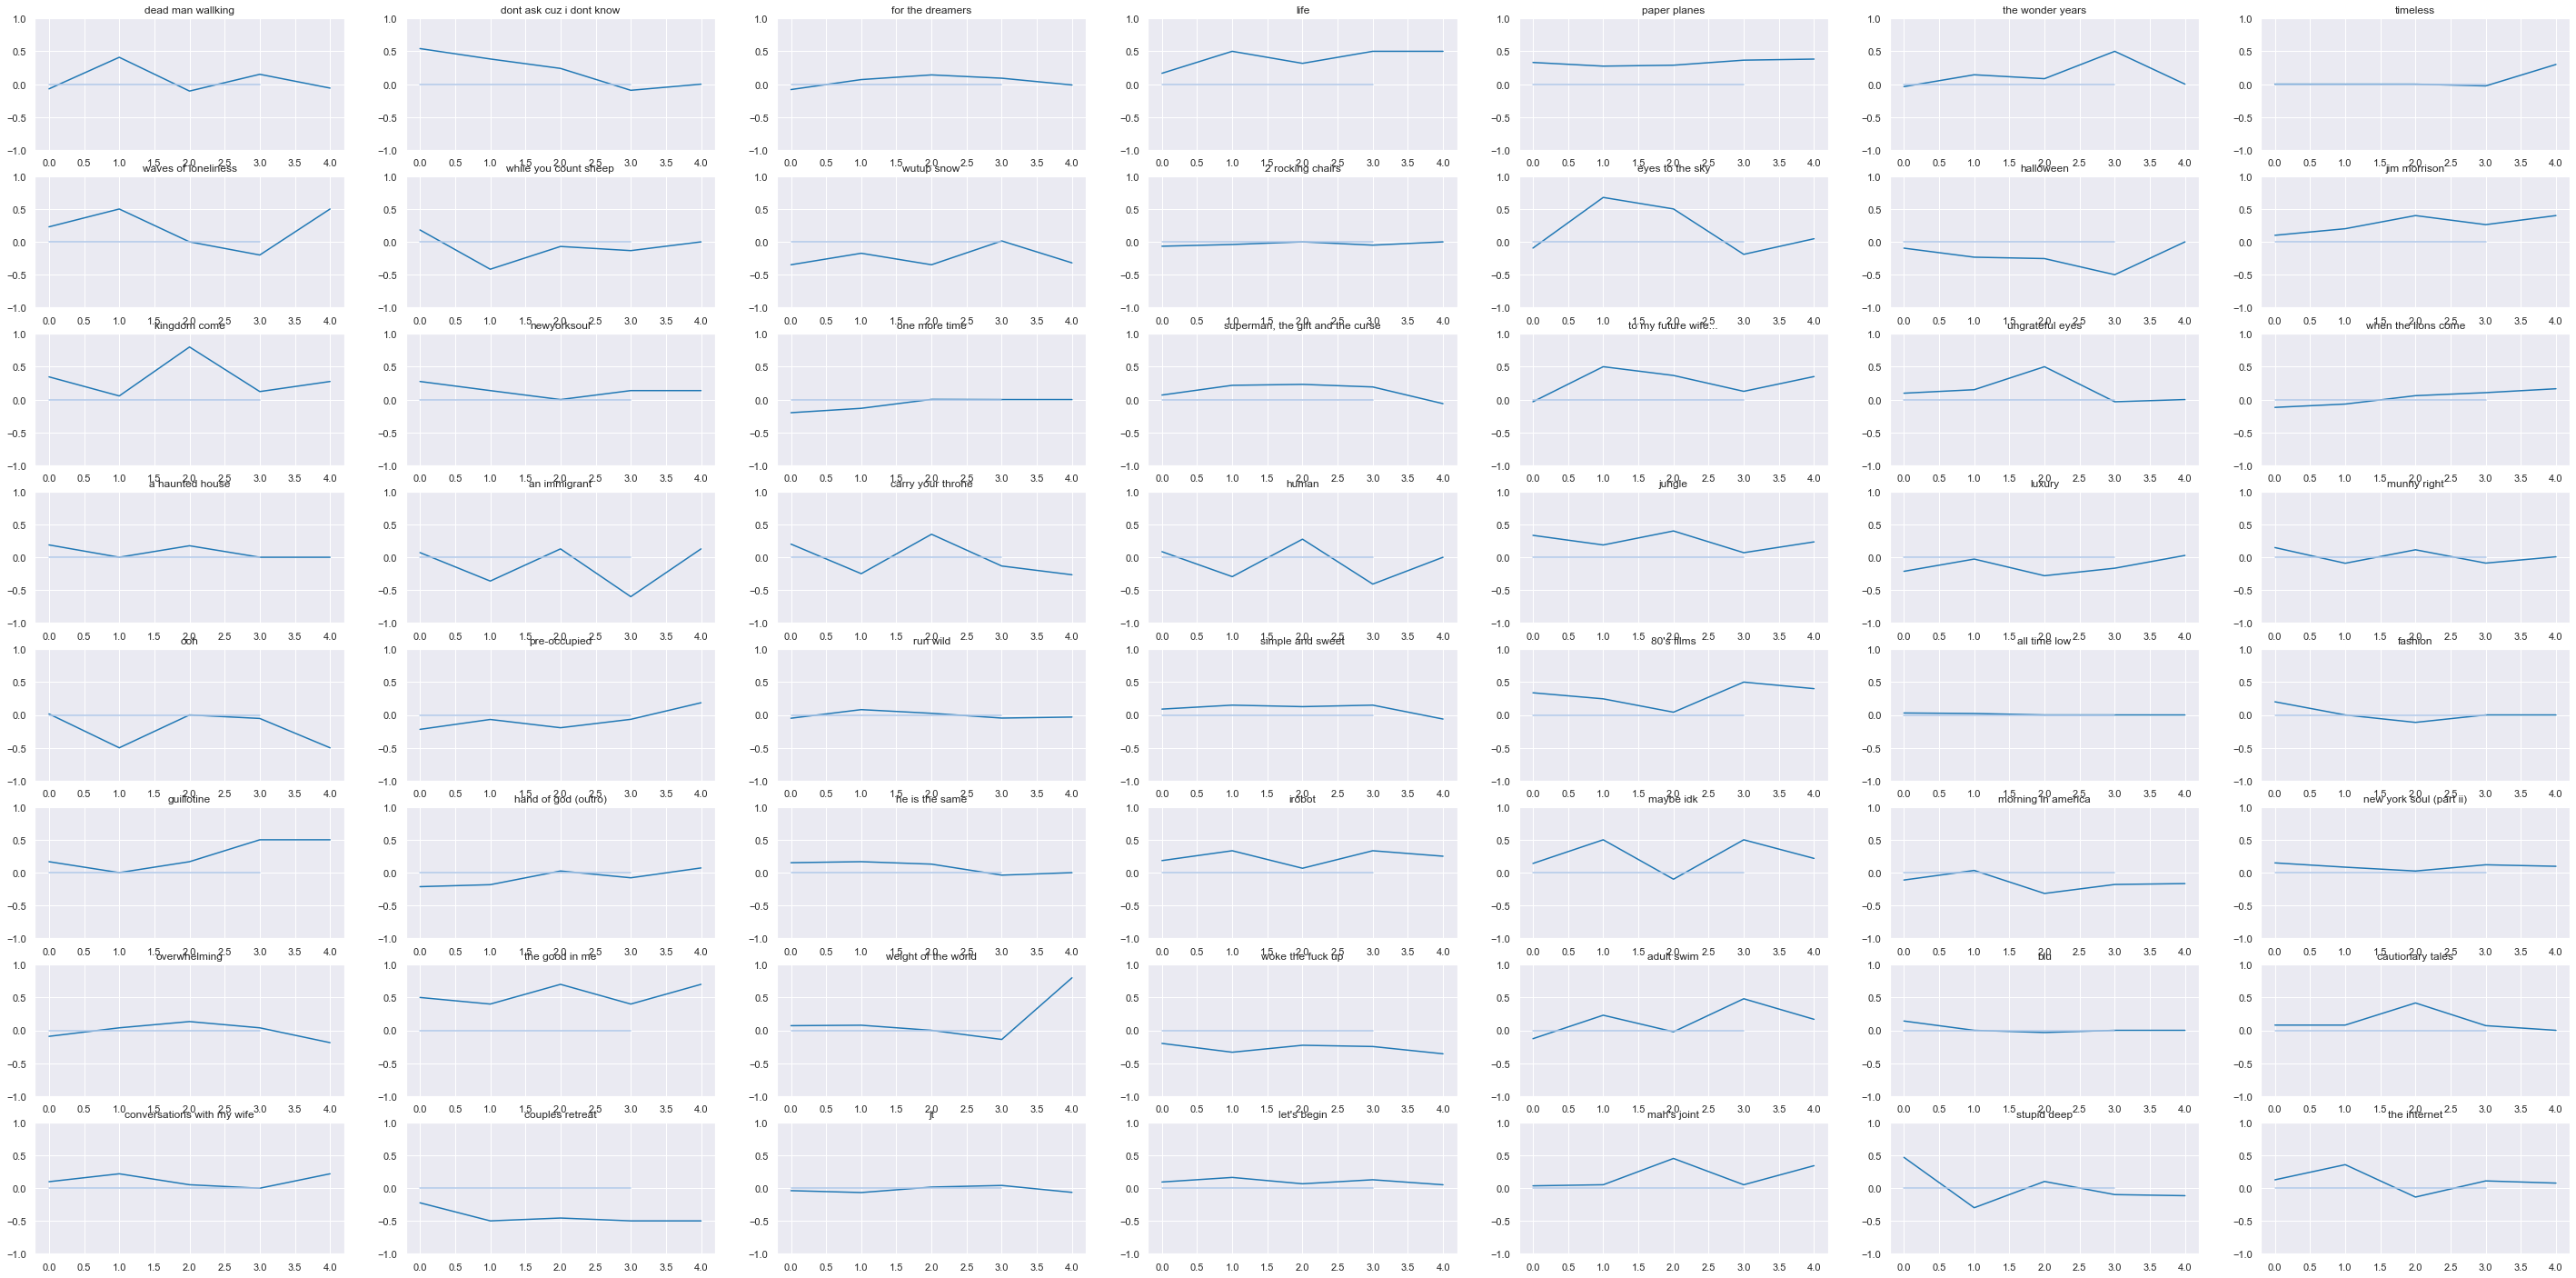

In [85]:
plt.rcParams['figure.figsize'] = [50, 25]

for index, title in enumerate(data.index):    
    plt.subplot(8,7, index+1)
    plt.plot(polarity_lyrics[index])
    plt.plot(np.arange(0,4), np.zeros(4))
    plt.title(data['titles'][index])
    plt.ylim(ymin=-1, ymax=1)
    
plt.show()

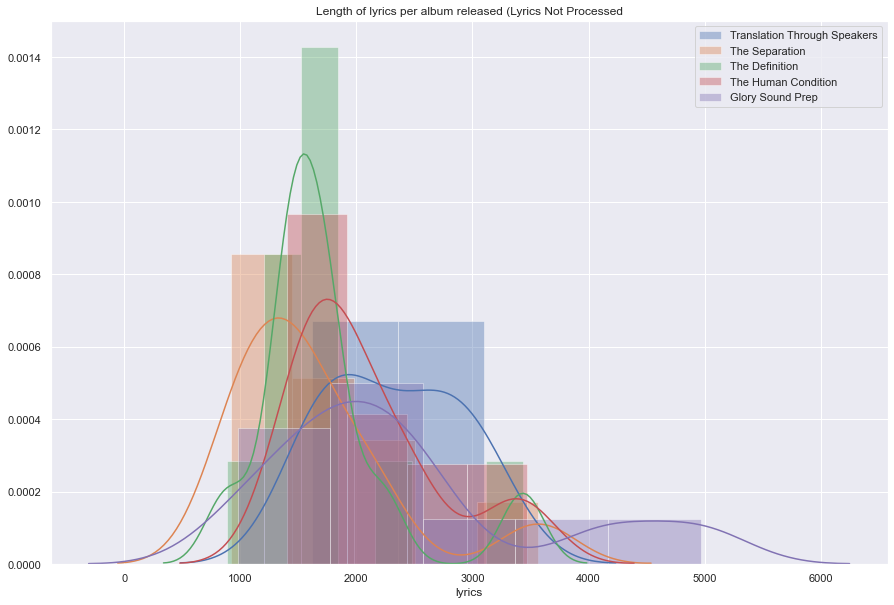

In [24]:
sns.set(rc = {'figure.figsize':(15, 10)})
album1 = data[data['album'] == 'translation_through_speakers']['lyrics'].str.len()
sns.distplot(album1, label = 'Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['lyrics'].str.len()
sns.distplot(album2, label = 'The Separation')
album3 = data[data['album'] == 'the_definition']['lyrics'].str.len()
sns.distplot(album3, label = 'The Definition')
album4 = data[data['album'] == 'the_human_condition']['lyrics'].str.len()
sns.distplot(album4, label = 'The Human Condition')
album5 = data[data['album'] == 'glory_sound_prep']['lyrics'].str.len()
sns.distplot(album5, label = 'Glory Sound Prep')
plt.title('Length of lyrics per album released (Lyrics Not Processed')
plt.legend();

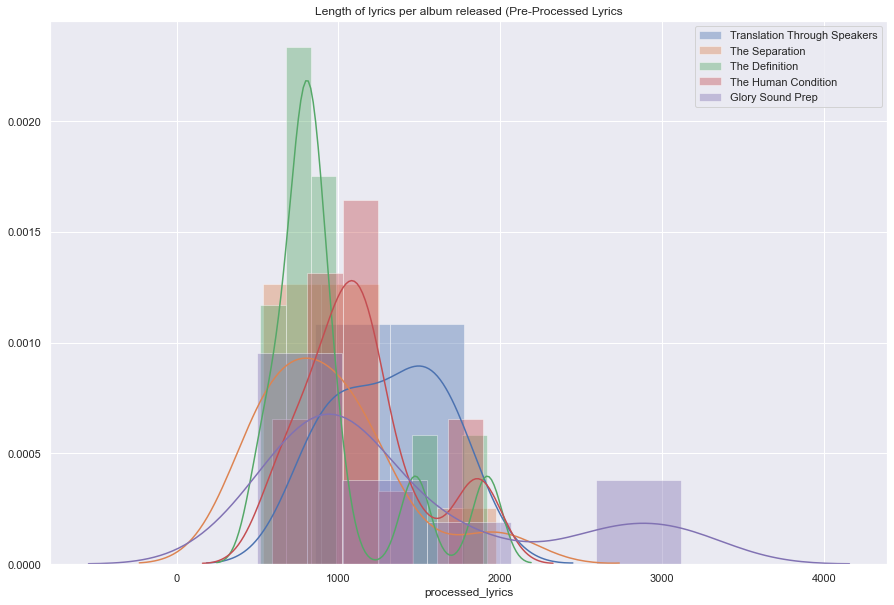

In [25]:
sns.set(rc = {'figure.figsize':(15, 10)})
album1 = data[data['album'] == 'translation_through_speakers']['processed_lyrics'].str.len()
sns.distplot(album1, label = 'Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['processed_lyrics'].str.len()
sns.distplot(album2, label = 'The Separation')
album3 = data[data['album'] == 'the_definition']['processed_lyrics'].str.len()
sns.distplot(album3, label = 'The Definition')
album4 = data[data['album'] == 'the_human_condition']['processed_lyrics'].str.len()
sns.distplot(album4, label = 'The Human Condition')
album5 = data[data['album'] == 'glory_sound_prep']['processed_lyrics'].str.len()
sns.distplot(album5, label = 'Glory Sound Prep')
plt.title('Length of lyrics per album released (Pre-Processed Lyrics')
plt.legend();